# Imports

In [1]:
import numpy as np
from funs import ridge
from funs import loadFittingDataP2
from funs.poly_basis import polynomial_basis
from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline

# Read data

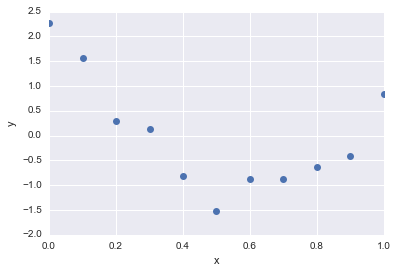

In [2]:
(X,Y) = loadFittingDataP2.getData()
X.shape = (X.shape[0],1) # polynomial_basis requires a 2d array

In [3]:
M = 3 
gamma = .01

phi = polynomial_basis(X, M)
r = ridge.ridge()
r.train(phi, Y, gamma = gamma)
Y_hat = r.predict(phi)

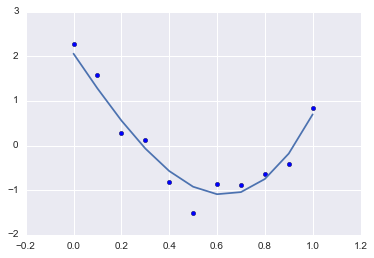

In [4]:
plt.plot(X, Y_hat)
plt.scatter(X, Y)

# Evolution of Params with $\gamma$

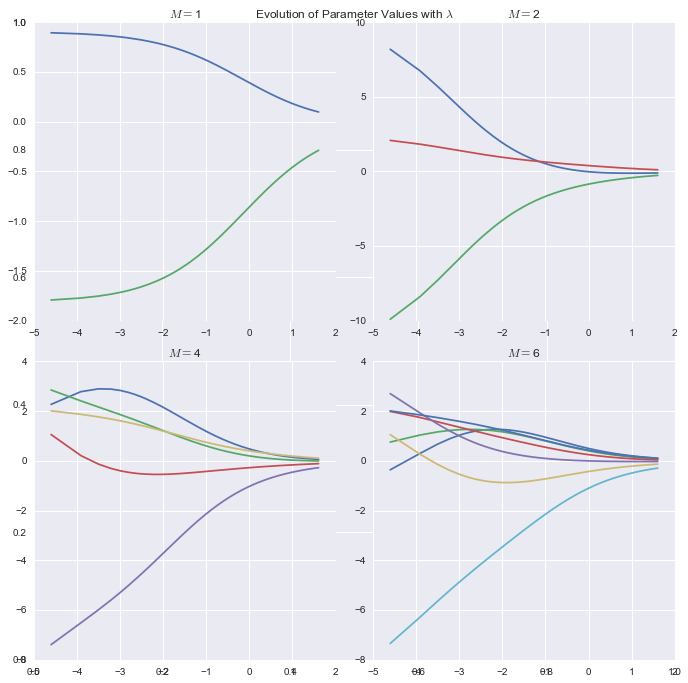

In [7]:
fig = plt.figure(figsize=(10, 10))
plt.title('Evolution of Parameter Values with $\lambda$')

Ms = [1, 2, 4, 6]
for j in [1,2,3,4]:
    ax = fig.add_subplot(2,2,j)
    M = Ms[j-1]
    phi = polynomial_basis(X, M)
    step = .01
    gammas = np.arange(step, 5, step)
    params = np.zeros((len(gammas), phi.shape[1]))  
    for i in range(len(gammas)):
        r.train(phi, Y, gamma = gammas[i])
        params[i] = r.beta
    ax.plot(np.log(gammas), params) # needs labels, some aesthetics
    ax.set_title(r'$M = $' + str(M))
plt.tight_layout()


# Model Selection In Ridge Regression

Our core idea is to compute the validation RSS for a variety of hyperparameter choices and then plot as a surface to get a sense for the hyperparameter landscape. 

In [19]:
from funs import regressData
reload(regressData)
(X_A,Y_A) = regressData.getData('regressA_train.txt')
(X_B,Y_B) = regressData.getData('regressB_train.txt')
(X_V,Y_V) = regressData.getData('regress_validate.txt')

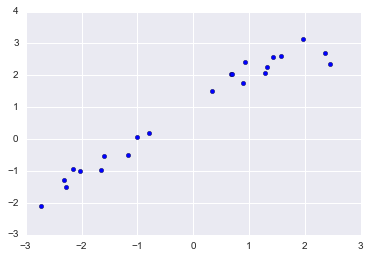

In [20]:
plt.scatter(X_V,Y_V)

In [53]:
def train_and_validate(M, gamma):
    phi_A = polynomial_basis(X_A,M)
    r.train(phi_A, Y_A, gamma)
    phi_V = polynomial_basis(X_V,M)
    residuals = r.predict(phi_V) - Y_V
    return np.dot(residuals.T, residuals)[0][0]

In [61]:
train_and_validate(4, .000001)

3.5788632407733814